# User-Interface for Res-IRF
The Res-IRF model is a tool for simulating energy consumption for space heating in the French residential sector.

Its main characteristic is to integrate a detailed description of the energy performance of the dwelling stock with a rich description of household behaviour.

This notebook is an example of post-treatment.

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

print(os.getcwd())
os.chdir(os.path.join(os.getcwd(), '..'))
print(os.getcwd())

from ui_utils import *


/Users/lucas/PycharmProjects/Res-IRF/project
/Users/lucas/PycharmProjects/Res-IRF


ImportError: cannot import name 'colors_dict' from 'parse_input' (/Users/lucas/PycharmProjects/Res-IRF/project/parse_input.py)

In [18]:
name_file = os.path.join(os.getcwd(), 'project', 'input', 'colors.json')
with open(name_file) as file:
    colors_dict = json.load(file)

**User need to enter folder's name:**

In [6]:
# name_folder = '20210604_094019'
name_folder = os.path.join('20210811_174310/Phebus_ZP_no_calib')

In [7]:
folder_output = os.path.join(os.getcwd(), 'project', 'output', name_folder)
print('Output will be taken from: {}'.format(folder_output))

Output will be taken from: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210811_174310/Phebus_ZP_no_calib


# Summary

In [8]:
summary = pd.read_csv(os.path.join(folder_output, 'summary.csv'), index_col=[0])
display(summary)

,Stock,Consumption conventional - wo/ calibration (kWh),Consumption actual - wo/ calibration (kWh),Consumption conventional (kWh),Consumption actual (kWh),Emission (gCO2),Heating intensity renovation (%),Flow transition renovation,Aggregated renovation rate renovation (%),Capex renovation (€),Subsidies renovation (€),Energy poverty
2012,2.397264e+07,3.790082e+11,2.524942e+11,4.303267e+11,2.843122e+11,5.180027e+13,0.747260,NaN,NaN,NaN,NaN,2.743410e+06
2013,2.426310e+07,3.732818e+11,2.515213e+11,4.235893e+11,2.831679e+11,5.171033e+13,0.757866,523039.219066,0.021818,5.690728e+09,0.0,2.706010e+06
2014,2.454530e+07,3.672537e+11,2.484821e+11,4.165349e+11,2.793549e+11,5.136728e+13,0.763036,530458.940661,0.022175,5.622593e+09,0.0,2.394326e+06
2015,2.481768e+07,3.615276e+11,2.515502e+11,4.098287e+11,2.824704e+11,5.254895e+13,0.781759,534295.374704,0.022407,5.363499e+09,0.0,2.359308e+06
2016,2.508063e+07,3.560850e+11,2.551876e+11,4.034388e+11,2.863310e+11,5.367021e+13,0.803383,541430.212983,0.022786,5.179558e+09,0.0,1.952565e+06
2017,2.533483e+07,3.504658e+11,2.510606e+11,3.968515e+11,2.815283e+11,5.265760e+13,0.809768,561099.260162,0.023696,5.174887e+09,0.0,1.984956e+06
2018,2.558069e+07,3.443114e+11,2.444289e+11,3.897259e+11,2.743960e+11,5.096343e+13,0.810638,595535.957957,0.025239,5.375889e+09,0.0,2.109792e+06
2019,2.581860e+07,3.371606e+11,2.383983e+11,3.815208e+11,2.678703e+11,4.971612e+13,0.812705,659984.413316,0.028068,5.628110e+09,0.0,2.086403e+06


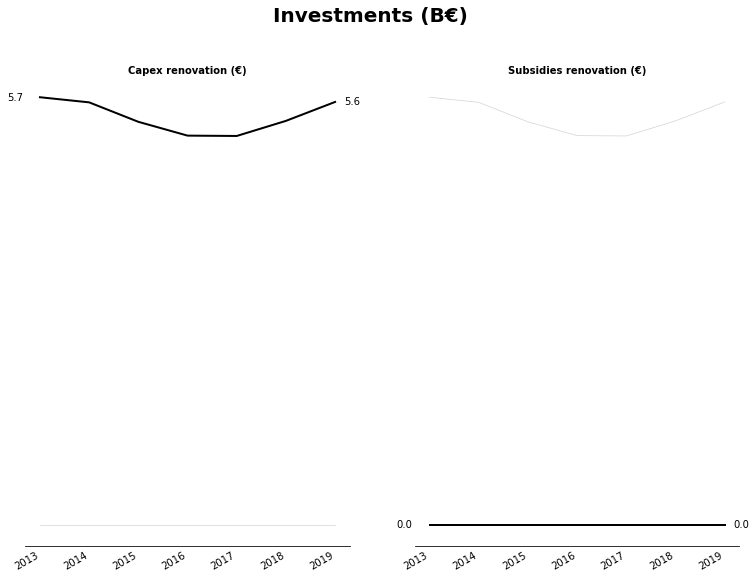

In [9]:
df = summary.loc[:, ['Capex renovation (€)', 'Subsidies renovation (€)']]
df.dropna(inplace=True)
economic_subplots(df.T, 'Investments (B€)', format_val=lambda x: '{:,.1f}'.format(x / 10**9), n_columns=2)

In [10]:
df = summary.loc[:, ['Cite (€)', 'Cee subsidy (€)', 'Eptz (€)']]
df.dropna(inplace=True)
economic_subplots(df.T, 'Subsidies (M€)', format_val=lambda x: '{:,.0f}'.format(x / 10**6), n_columns=3)

KeyError: "None of [Index(['Cite (€)', 'Cee subsidy (€)', 'Eptz (€)'], dtype='object')] are in the [columns]"

# Reading detailed input

3 kind of output:
- Buildings stock dynamic and attributes (consumption, heating intensity)
- Renovation
- Detailed subsidies

In [16]:
output_stock = pickle.load(open(os.path.join(folder_output, 'output_stock.pkl'), 'rb'))
output_transition = pickle.load(open(os.path.join(folder_output, 'output_transition.pkl'), 'rb'))
#output_subsidies = pickle.load(open(os.path.join(folder_output, 'output_subsides.pkl'), 'rb'))
#output_subsidies_year = pickle.load(open(os.path.join(folder_output, 'output_subsides_year.pkl'), 'rb'))

In [12]:
output_stock.keys()

dict_keys(['Stock - Renovation', 'Stock (m2) - Renovation', 'Consumption conventional (kWh/m2) - Renovation', 'Consumption conventional (kWh) - Renovation', 'Consumption actual (kWh/m2) - Renovation', 'Consumption actual (kWh) - Renovation', 'Budget share (%) - Renovation', 'Heating intensity (%) - Renovation', 'Emission (gCO2/m2) - Renovation', 'Emission (gCO2) - Renovation', 'Taxes cost (€/m2) - Renovation', 'Taxes cost (€) - Renovation', 'Stock - Construction', 'Stock (m2) - Construction', 'Consumption conventional (kWh/m2) - Construction', 'Consumption conventional (kWh) - Construction', 'Consumption actual (kWh/m2) - Construction', 'Consumption actual (kWh) - Construction', 'Budget share (%) - Construction', 'Heating intensity (%) - Construction', 'Emission (gCO2/m2) - Construction', 'Emission (gCO2) - Construction', 'Taxes cost (€/m2) - Construction', 'Taxes cost (€) - Construction', 'Stock', 'Stock (m2)', 'Consumption conventional (kWh/m2)', 'Consumption conventional (kWh)', 'Co

# Initial dwelling stock

KeyError: "None of [Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'], dtype='object', name='Income class')] are in the [index]"

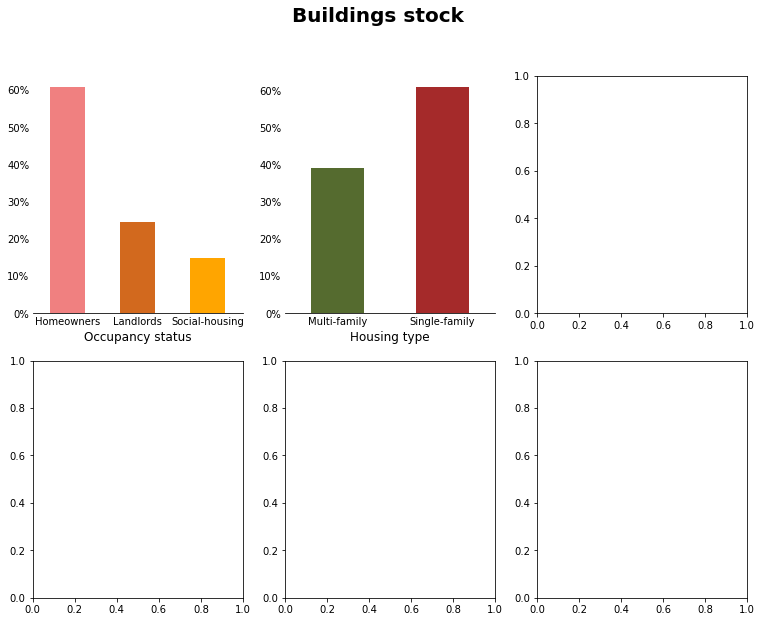

In [19]:
dict_order = {'Energy performance': ['G', 'F', 'E', 'D', 'C', 'B', 'A'], 'Income class': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'], 'Income class owner': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']}
stock_attributes_subplots(output_stock['Stock - Renovation'].loc[:, 2018], dict_order=dict_order, dict_color=colors_dict)

# Evolution of dwelling stock
Res-IRF considers stock dynamics. Buildings demolition, construction and renovation.

In [20]:
def grouped_and_graph(df, level, title, level_order=None, format_val=lambda x: '{:.1f}M'.format(x / 10**6), func='sum'):
    
    if func == 'sum':   
        df = df.groupby([level]).sum()
    elif func == 'mean':
        df = df.groupby([level]).mean()

        
    if level_order:
        df = df.loc[level_order]
    economic_subplots(df, '{} by {}'.format(title, level.lower()),
                      format_axtitle=lambda x: x, format_val=format_val)


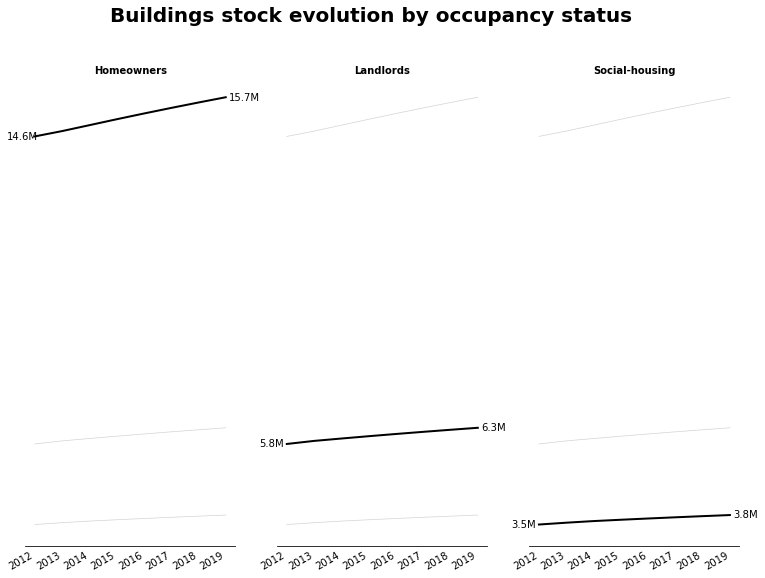

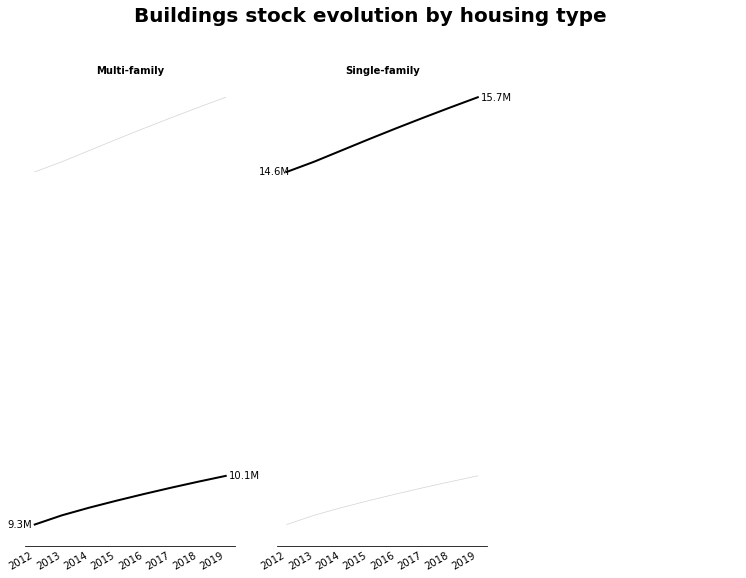

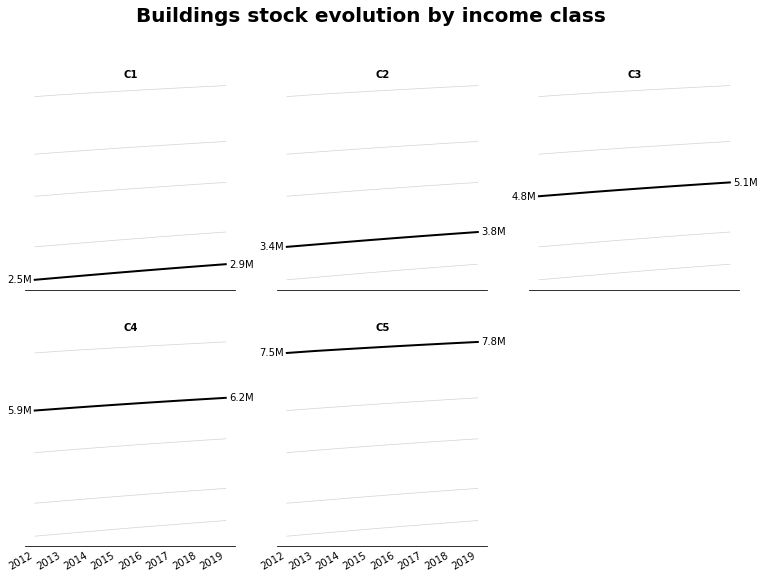

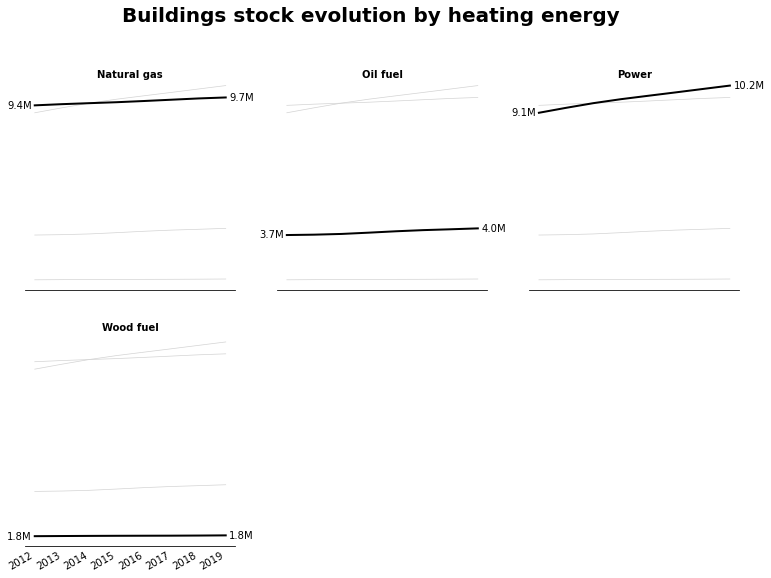

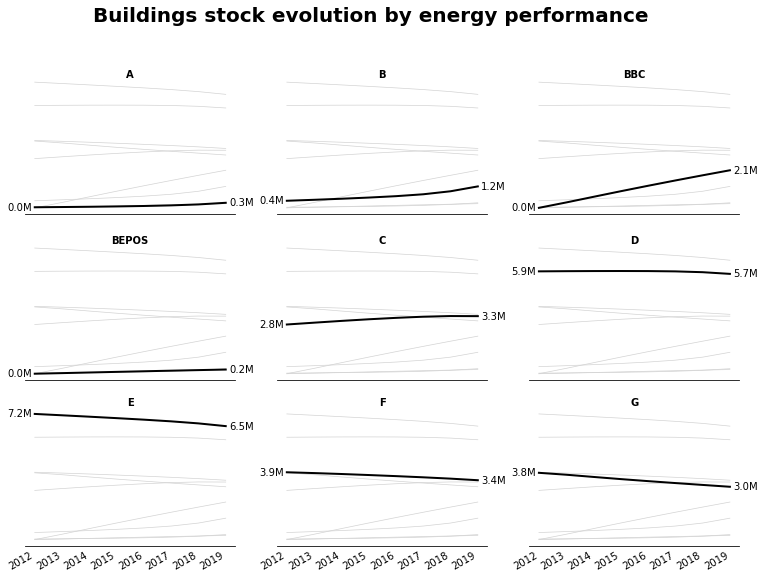

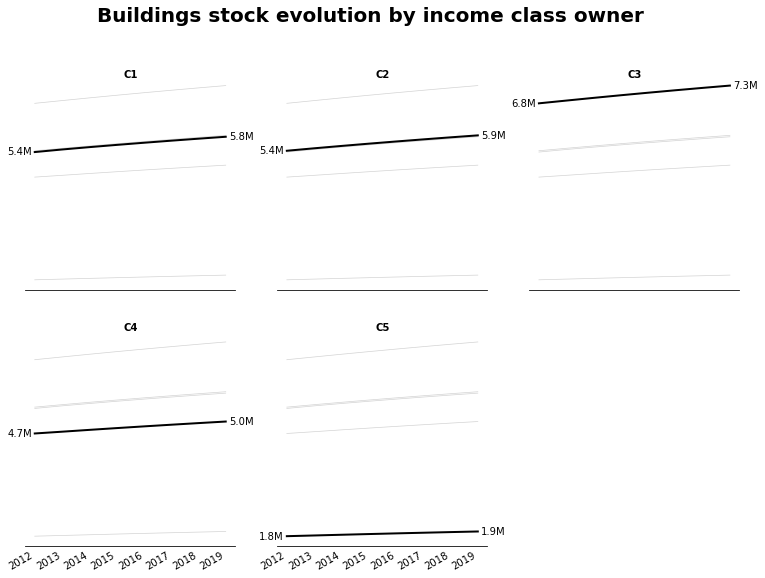

In [21]:
for level in output_stock['Stock'].index.names:
    grouped_and_graph(output_stock['Stock'], level, 'Buildings stock evolution')#, level_order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'BEPOS', 'BBC'])

In [22]:
for k in output_stock.keys():
    if isinstance(output_stock[k], pd.DataFrame):
        output_stock[k].dropna(axis=1, how='all', inplace=True)

# Energy consumption

Energy consumption is calculated in kWh in Res-IRF (/$10^9$ for TWh)

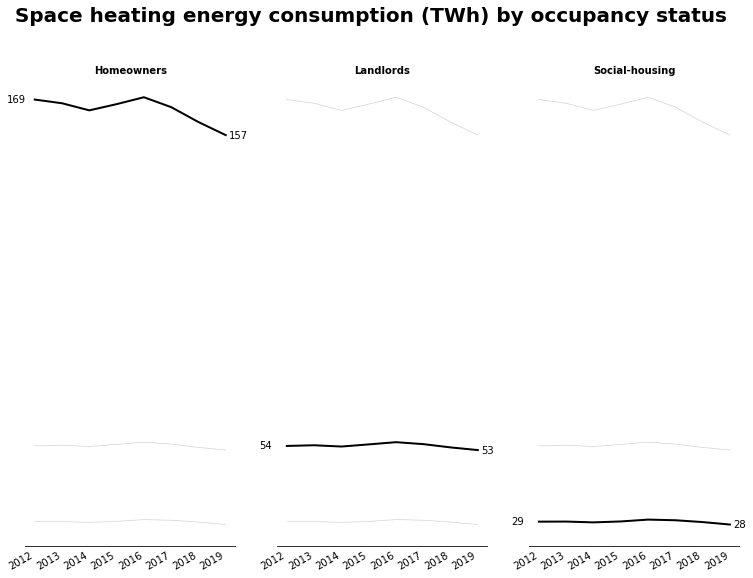

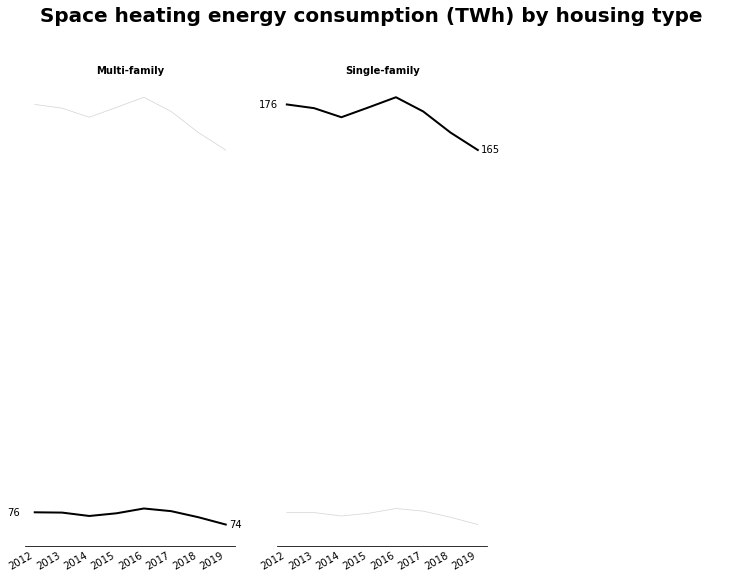

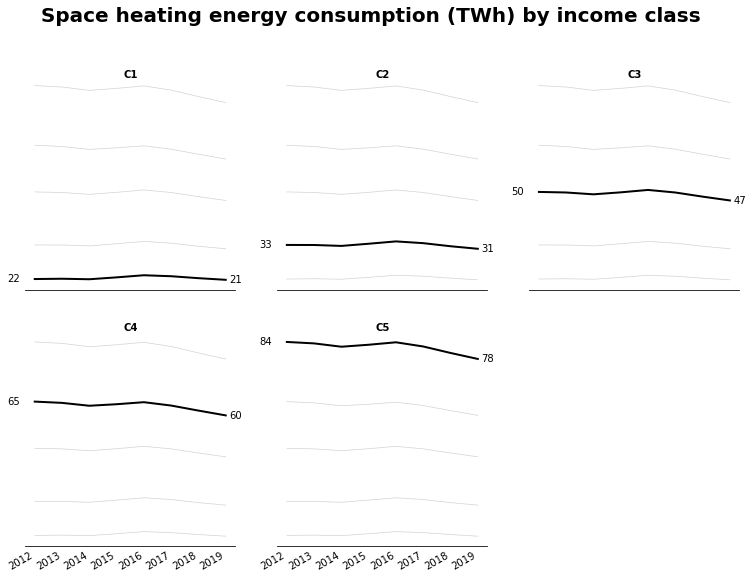

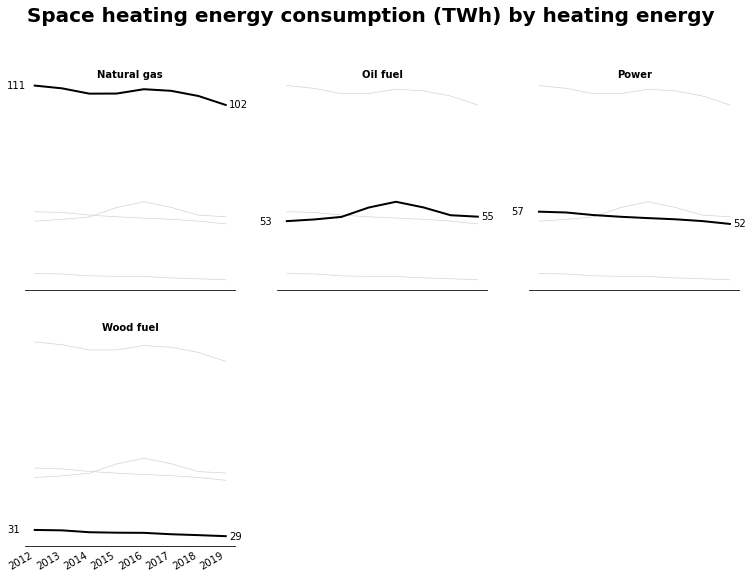

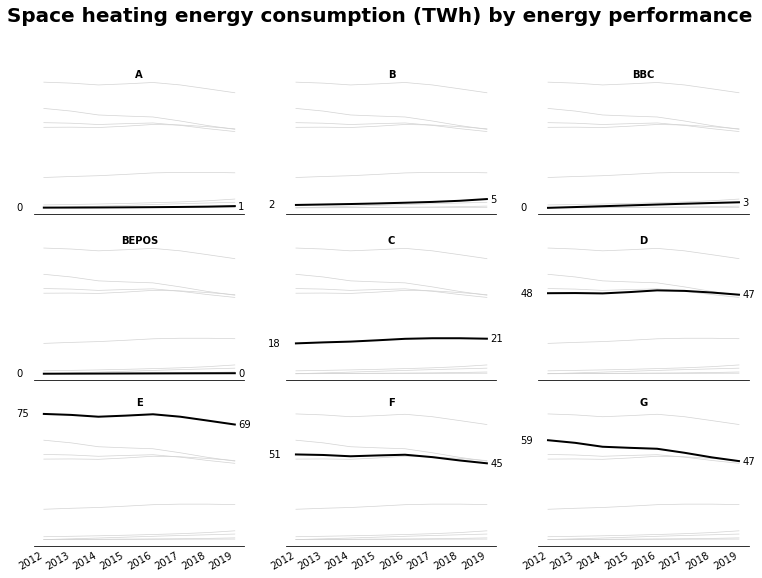

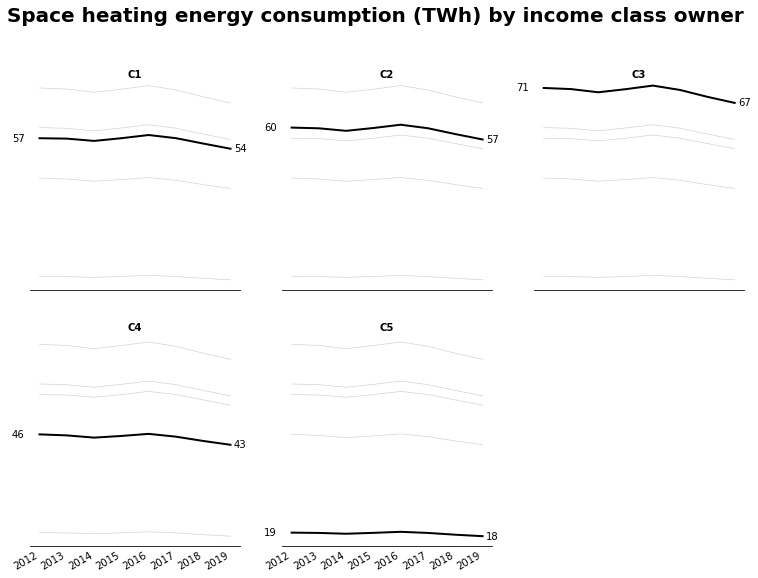

In [23]:
for level in output_stock['Consumption actual (kWh)'].index.names:
    grouped_and_graph(output_stock['Consumption actual (kWh)'], level, 'Space heating energy consumption (TWh)', format_val=lambda x: '{:.0f}'.format(x / 10**9))

# CO2 Emissions

CO2 emisisons is in gCO2 (/$10^{12}$ MtCO2)

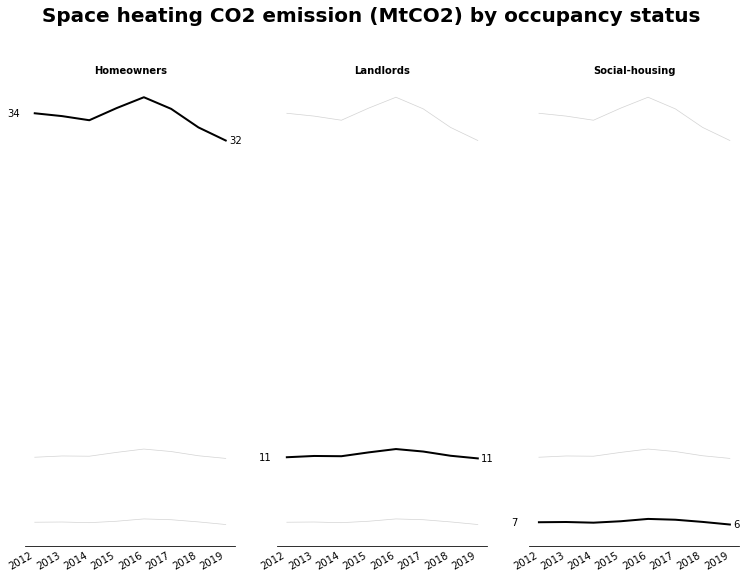

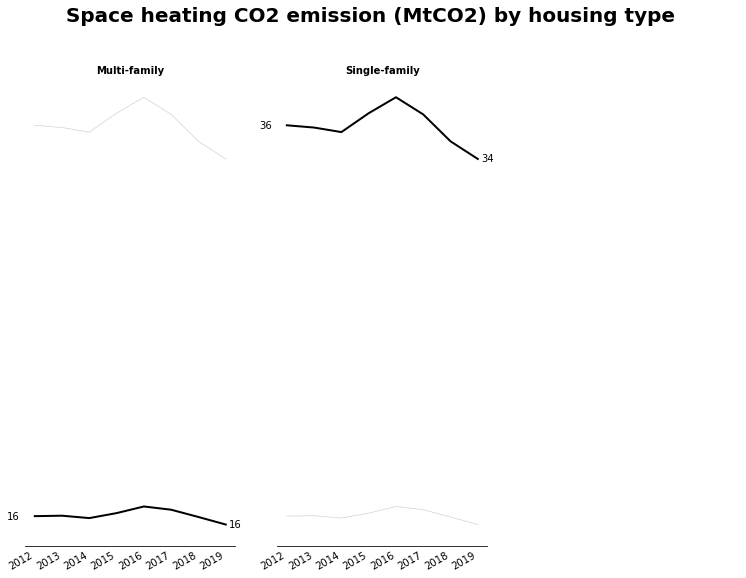

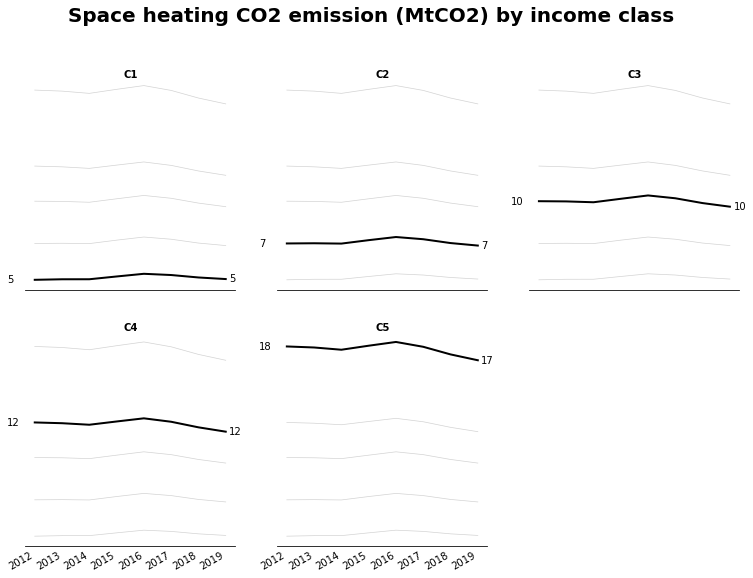

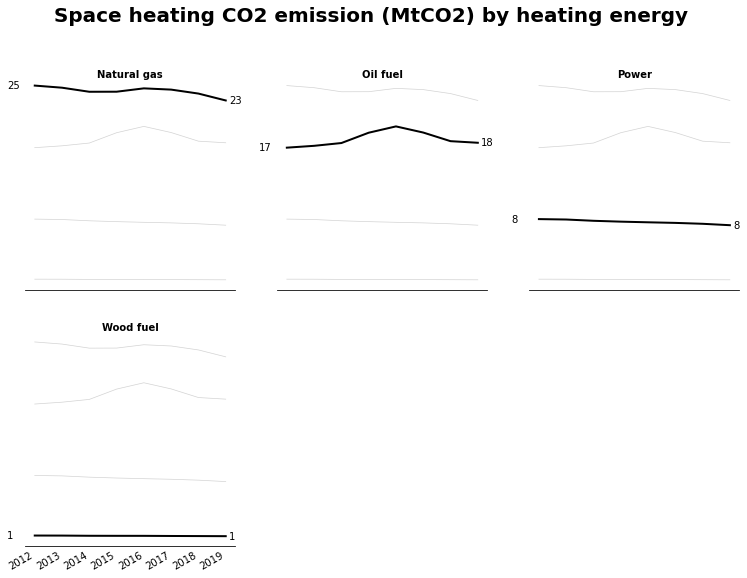

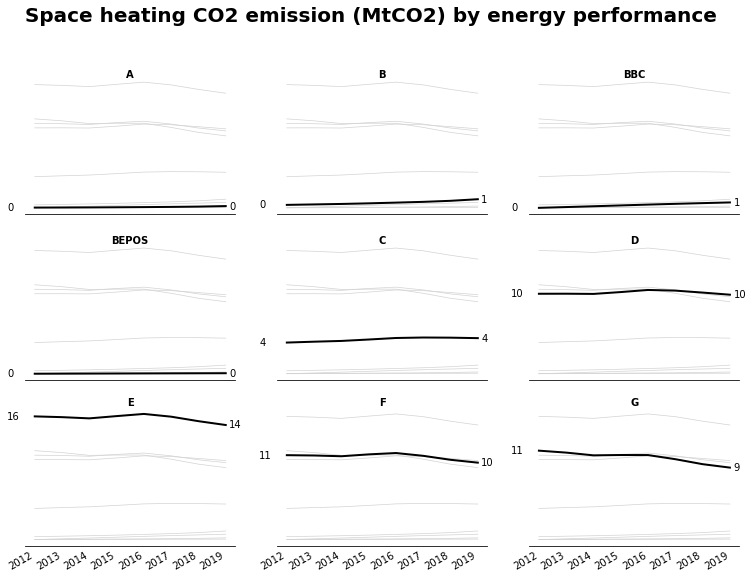

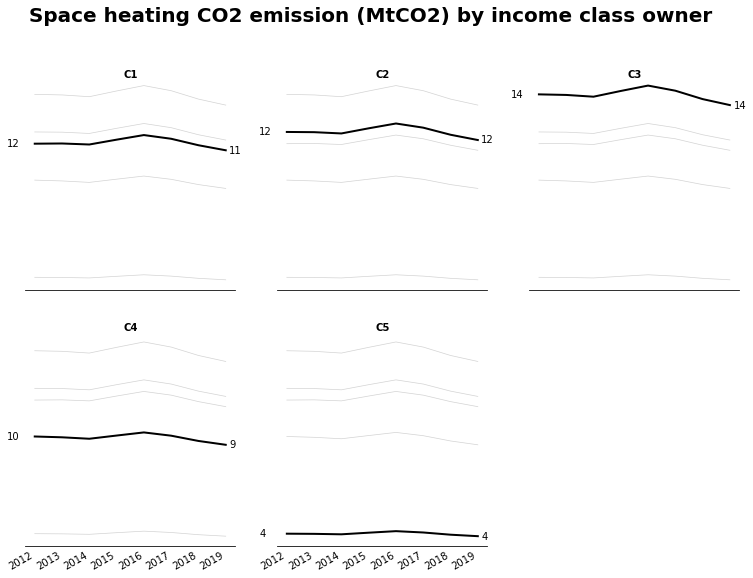

In [24]:
for level in output_stock['Emission (gCO2)'].index.names:
    grouped_and_graph(output_stock['Emission (gCO2)'], level, 'Space heating CO2 emission (MtCO2)', format_val=lambda x: '{:.0f}'.format(x / 10**12))

# Renovation rate

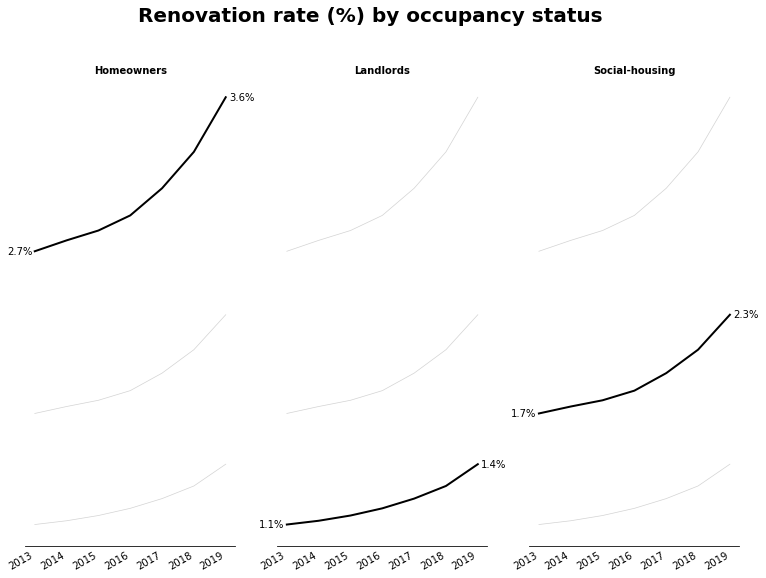

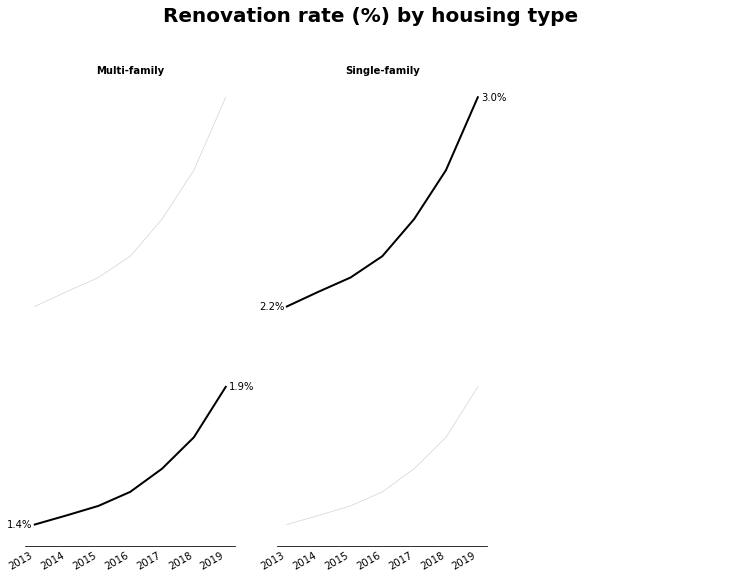

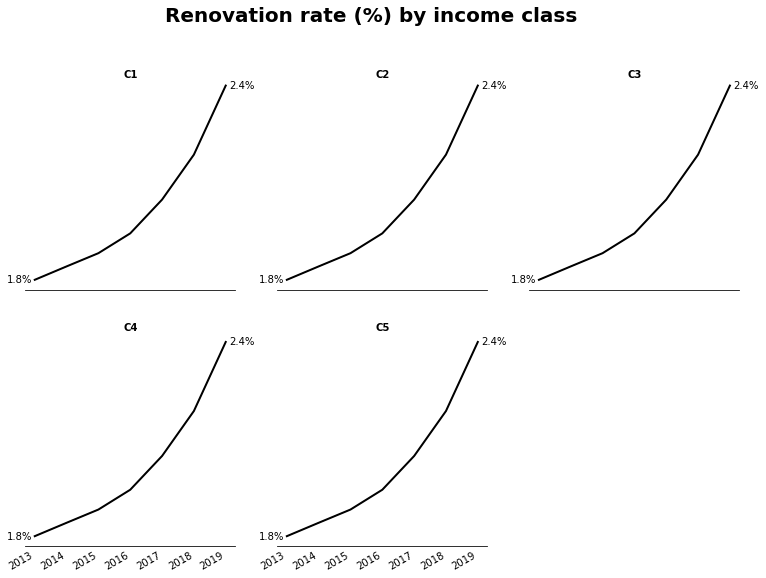

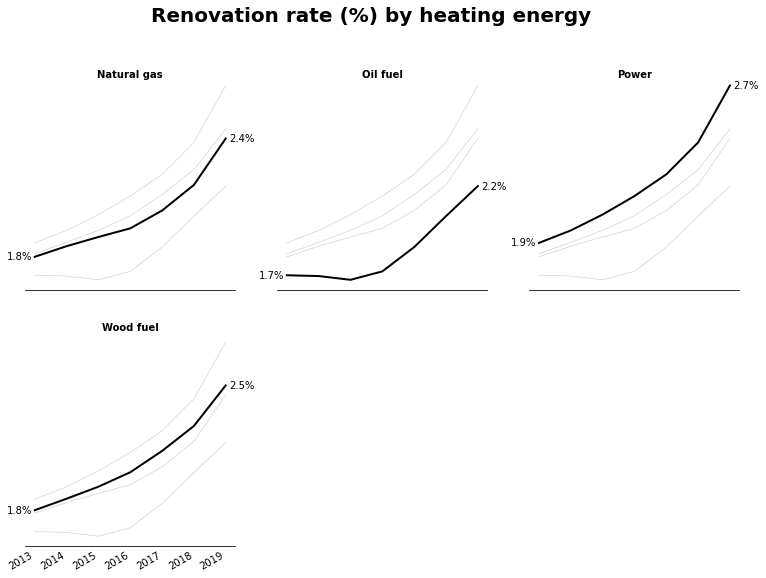

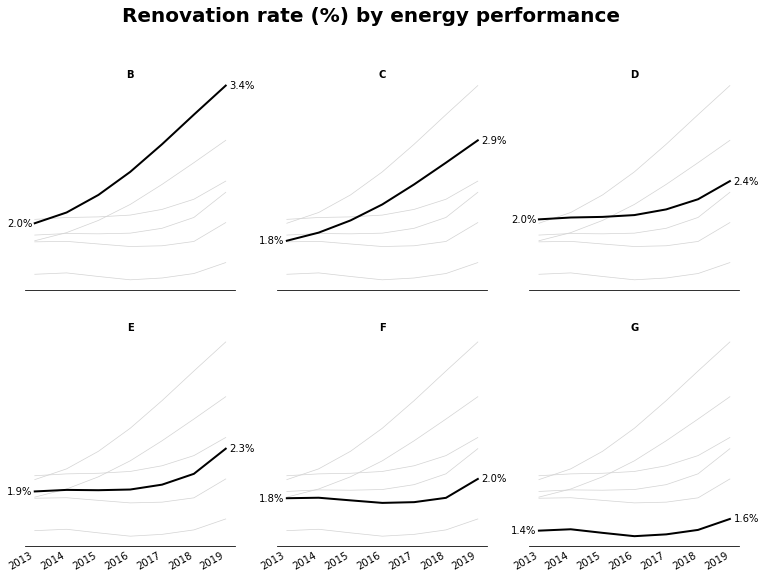

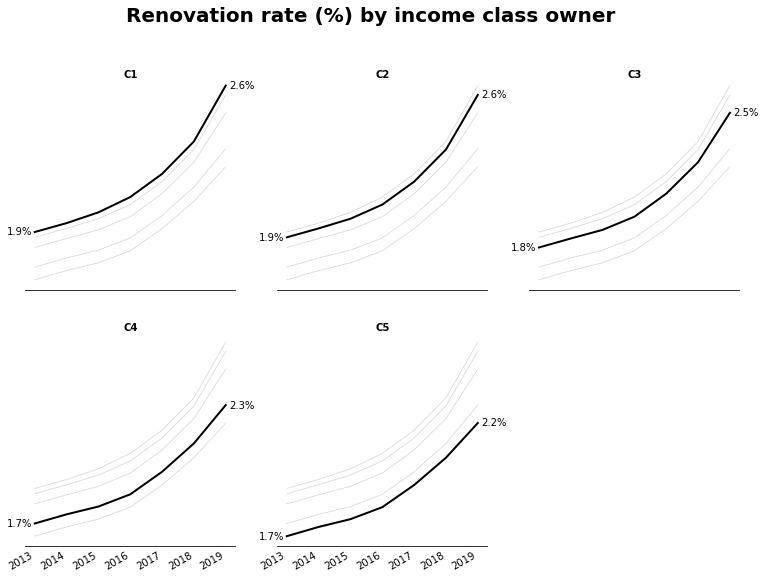

In [25]:
for level in output_stock['Renovation rate (%) - Renovation'].index.names:
    grouped_and_graph(output_stock['Renovation rate (%) - Renovation'], level, 'Renovation rate (%)', format_val=lambda x: '{:.1%}'.format(x), func='mean')

# Use intensity

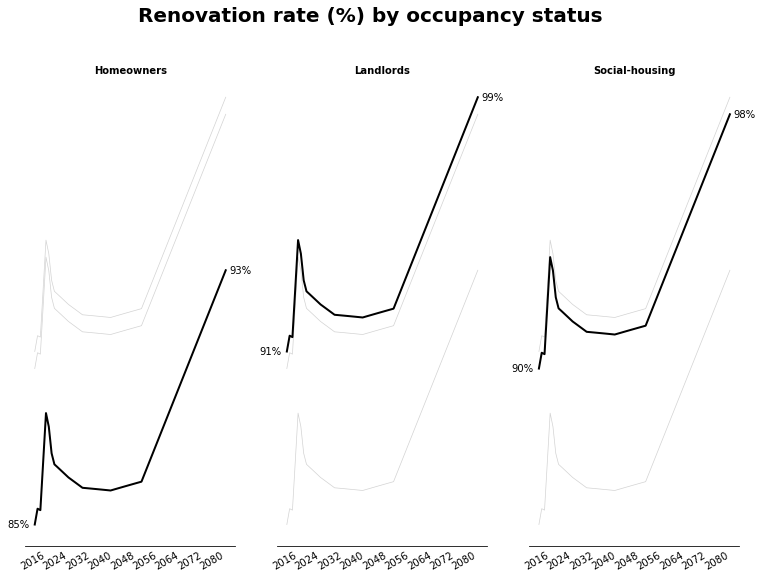

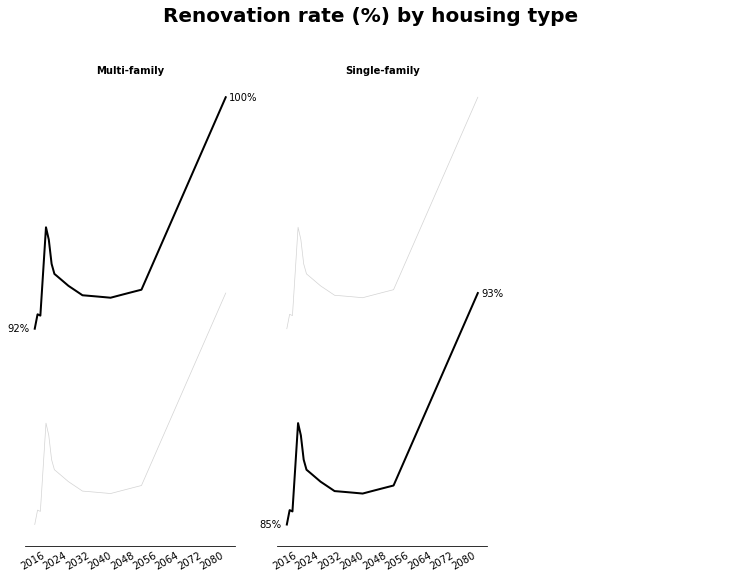

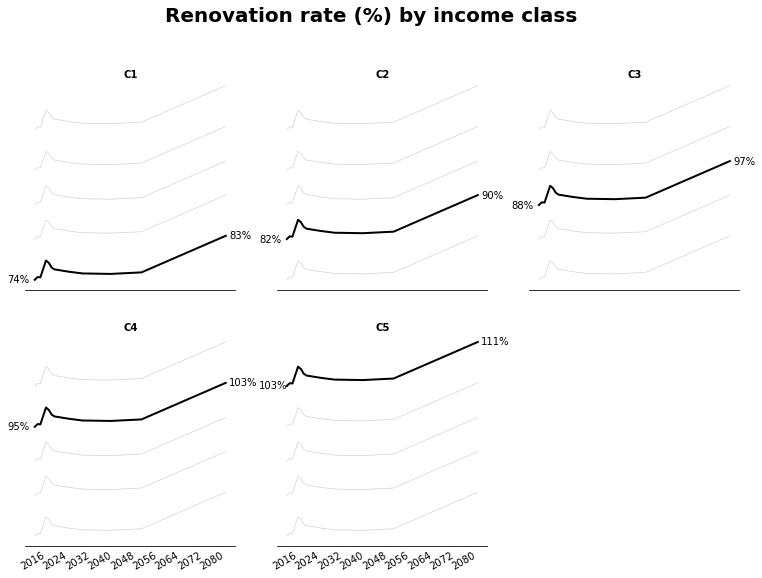

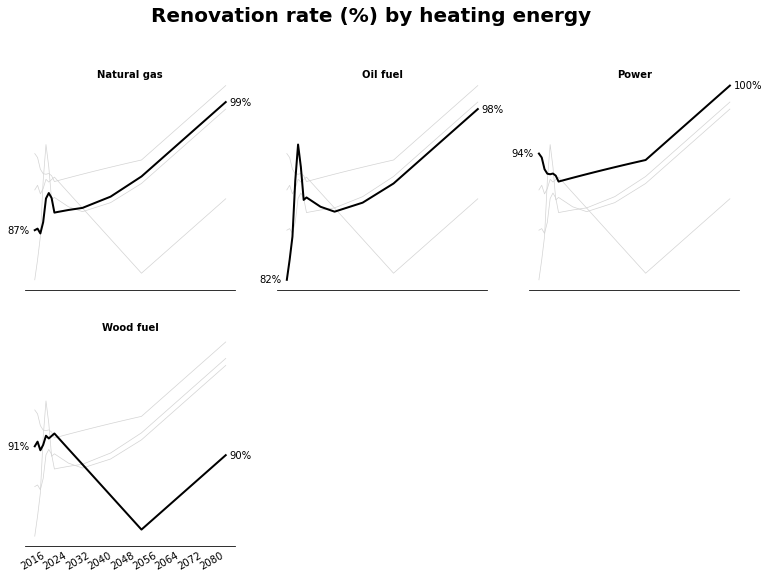

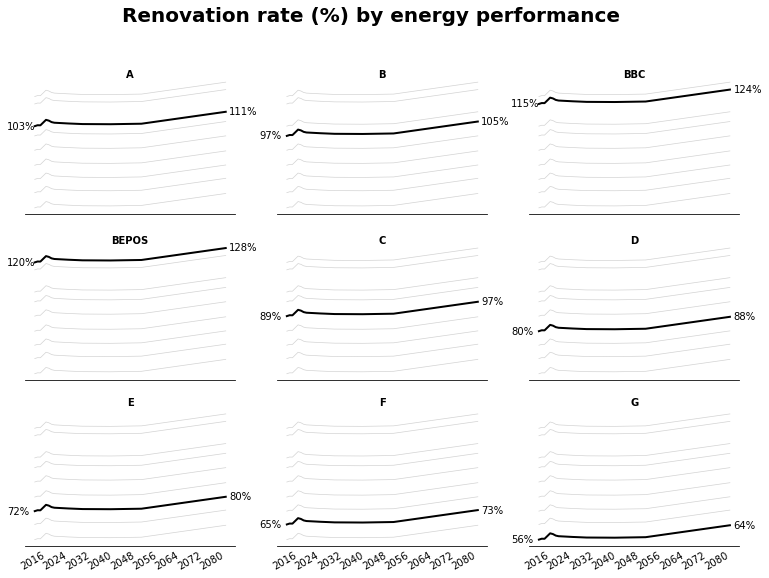

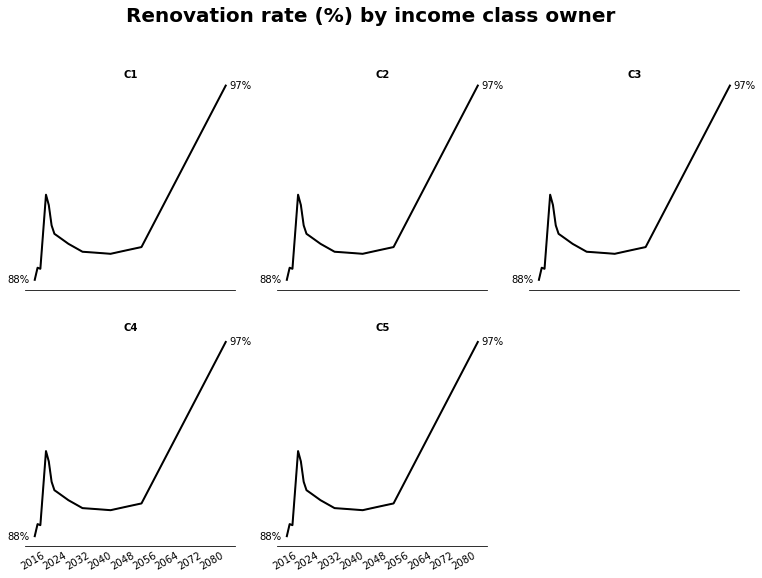

In [27]:
for level in output_stock['Heating intensity (%)'].index.names:
    grouped_and_graph(output_stock['Heating intensity (%)'], level, 'Renovation rate (%)', format_val=lambda x: '{:.0%}'.format(x), func='mean')

# Transition

In [28]:
output_transition.keys()

dict_keys(['Flow transition', 'Flow transition (m2)', 'Energy cost final (€/m2)', 'Energy cost initial (€/m2)', 'Energy cost saving (€/m2)', 'Capex wo/ intangible (€/m2)', 'Capex wo/ intangible energy performance (€/m2)', 'Capex intangible (€/m2)', 'Capex energy performance (€/m2)', 'Capex (€/m2)', 'Capex (€)', 'Subsidies (€/m2)', 'Subsidies (€)'])

## Flow

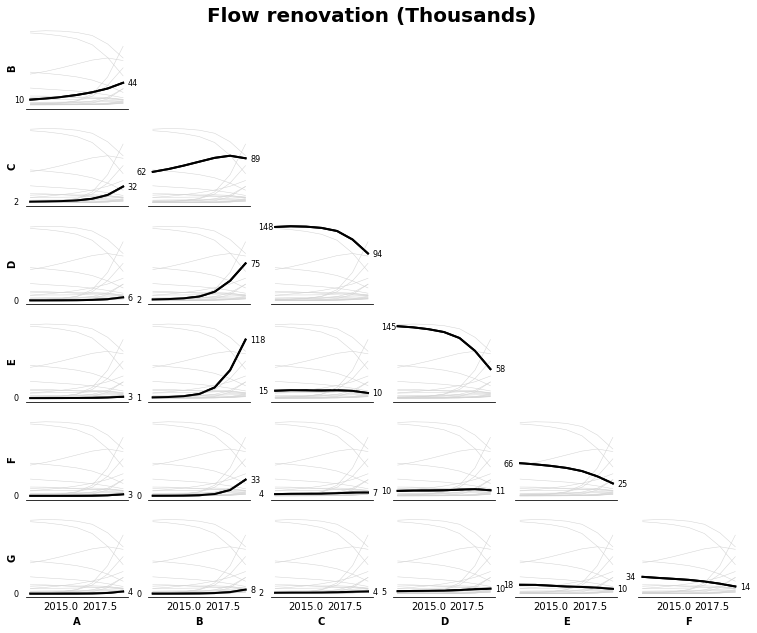

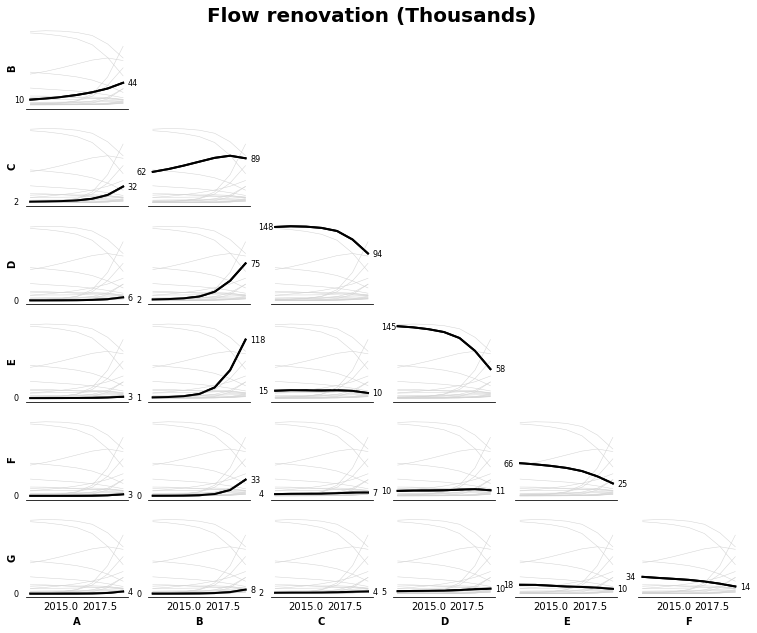

In [29]:
level_x = 'Energy performance'
level_y = 'Energy performance final'
table_plots(output_transition['Flow transition'].groupby([level_x, level_y]).sum(), suptitle='Flow renovation (Thousands)', format_val=lambda x: '{:,.0f}'.format(x / 1000))
table_plots(output_transition['Flow transition'].groupby([level_x, level_y]).sum(), level_x, level_y, suptitle='Flow renovation (Thousands)', format_val=lambda x: '{:,.0f}'.format(x / 1000))

## Capex 

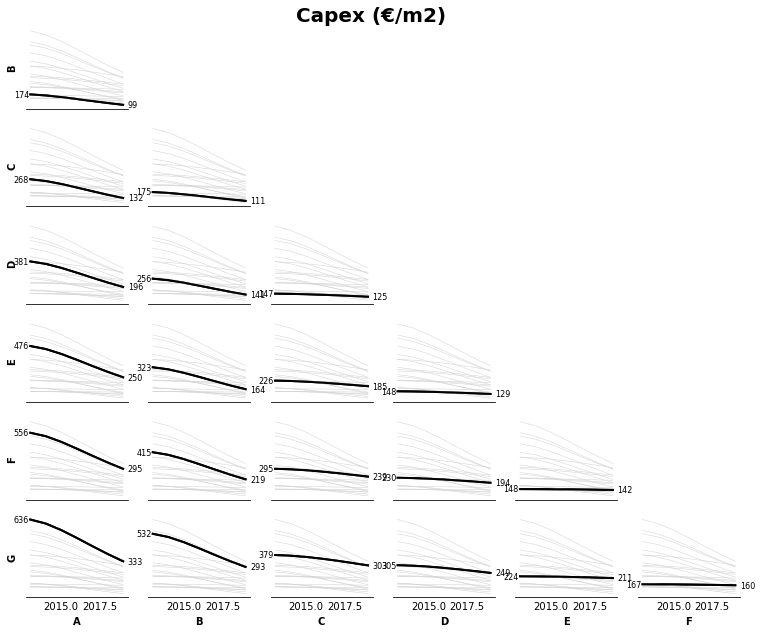

In [30]:
level_x = 'Energy performance'
level_y = 'Energy performance final'
table_plots(output_transition['Capex (€/m2)'].groupby([level_x, level_y]).mean(), level_x, level_y, suptitle='Capex (€/m2)', format_val=lambda x: '{:.0f}'.format(x))

## Subsidies

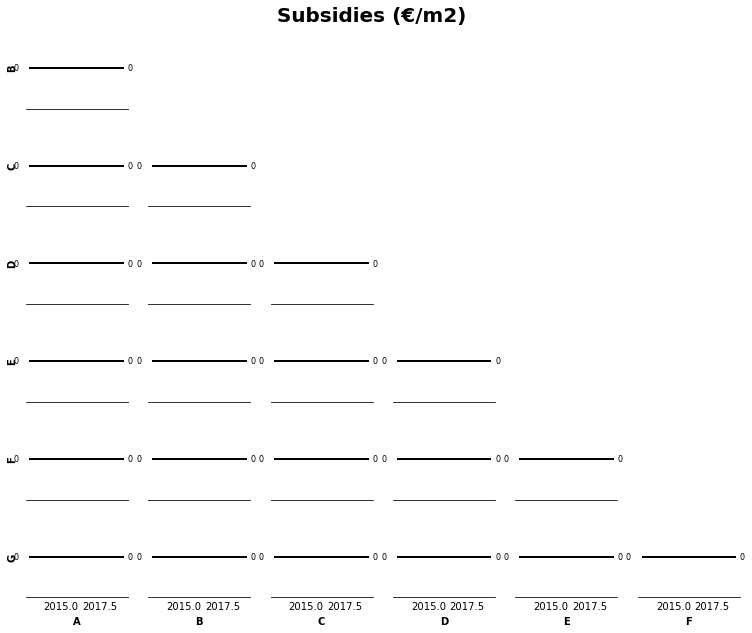

In [31]:
level_x = 'Energy performance'
level_y = 'Energy performance final'
table_plots(output_transition['Subsidies (€/m2)'].groupby([level_x, level_y]).mean(), level_x, level_y, suptitle='Subsidies (€/m2)', format_val=lambda x: '{:.0f}'.format(x))

### Details

In [ ]:
output_subsidies_year.keys()

In [ ]:
level_x = 'Energy performance'
level_y = 'Energy performance final'
table_plots(output_subsidies_year['cite (€/m2)'].groupby([level_x, level_y]).mean(), level_x, level_y, suptitle='', format_val=lambda x: '{:.0f}'.format(x))